FONSECA HINCAPIE Diana Sol Angel

 ## Projet E-commerce Brazil 

In [8]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar
import numpy as np


### Lecture des fichiers csv:

In [9]:

# closed_deals= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_closed_deals_dataset.csv', sep=',')
customers= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_customers_dataset.csv', sep=',')
geolocation= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_geolocation_dataset.csv', sep=',')
# marketing= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_marketing_qualified_leads_dataset.csv', sep=',')
order_items= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_order_items_dataset.csv', sep=',')
order_payments= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_order_payments_dataset.csv', sep=',')
order_reviews= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_order_reviews_dataset.csv', sep=',')
orders= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_orders_dataset.csv', sep=',', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']) #bon?
products= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_products_dataset.csv', sep=',')
sellers= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/olist_sellers_dataset.csv', sep=',')
product_category_name= pd.read_csv('/Users/dianasolfonseca/Desktop/base des donnes/Projet/brazilian_e-commerce/product_category_name_translation.csv', sep=',')

On commence par convertir les dates dans le tableau orders au format datetime de pandas.

In [11]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
# type(orders.order_purchase_timestamp[0]) #c'est bon

## La variation en temps du CAB

###  a) Les années et les mois qui sont les plus rentables. $\iff$ les années et les mois avec le chiffres d'affaires le plus élevé.


On commence par faire une jointure des tables orders et order_items par la clé order_id dans la table o_merged et on conserve tous les orders, on peut aussi remarquer que pour 1 order_1d (1seule commande) on peut avoir plusieurs order_item_id (plusieurs produits dans une commande). On fait cette jointure car on a besoin des informations des commandes comme la date d'achat, le prix, et les frais de port, on obtient ainsi une table avec les informations des commandes, et les paiements. 

In [12]:
o_merged = pd.merge(orders, order_items, on='order_id', how='left') # on conserve tous les orders 113425
# On remarque que 1 order peut avoir plusierus order_items (product_id)

In [13]:
#Exemple d'une order avec plusieurs order_items
o_merged.loc[o_merged['order_id'] == '9115830be804184b91f5c00f6f49f92d']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
113415,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,1.0,c982dbea53b864f4d27c1d36f14b6053,1caf283236cd69af44cbc09a0a1e7d32,2017-10-10 20:07:14,42.11,0.80
113416,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2.0,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,2017-10-10 20:07:14,26.90,36.98


Ensuite, on crée les colonnes year et month et month_year à partir de la colonne order_purchase_timestamp de la table orders.

In [15]:
o_merged['year'] = o_merged['order_purchase_timestamp'].dt.year #pour avoir l'année
o_merged['month'] = o_merged['order_purchase_timestamp'].dt.month_name() #pour avoir le mois
o_merged['month_year'] = o_merged['order_purchase_timestamp'].dt.strftime('%b-%Y') #pour avoir le mois et l'année

Pour calculer le chiffre d'affaires, on fait un group by par year, month et month_year et on fait la somme des prix de chaque commandes selon l'année, le mois ou le deux.


Par année:

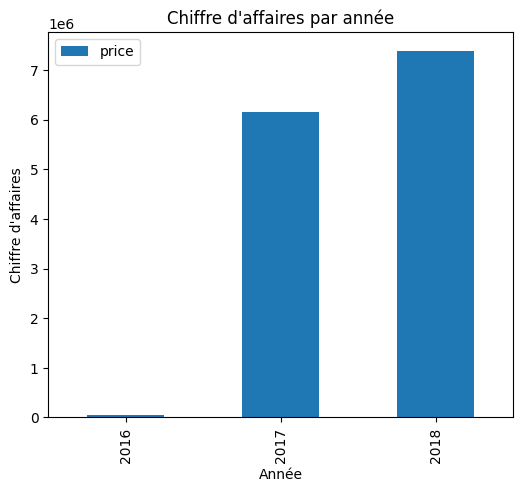

   Annee  Chiffre d'affaires
0   2018          7386050.80
1   2017          6155806.98
2   2016            49785.92


In [16]:
o_merged.groupby('year').price.sum().reset_index().plot(x='year', y='price', kind='bar', title='Chiffre d\'affaires par année', figsize=(6,5))
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Année')
plt.title('Chiffre d\'affaires par année')
plt.show()
ca_a=o_merged.groupby('year').price.sum().sort_values(ascending=False).reset_index()
ca_a.columns=['Annee', 'Chiffre d\'affaires']
print(ca_a)

On remarque que l'année 2018 est l'année le plus rentable avec un chiffre d'affaires de 7386050.80 reales. 

Par mois:

In [171]:
orders.describe()

/var/folders/sz/_3249w7n4qnfkxl2g0j3v2c80000gn/T/ipykernel_29581/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
/var/folders/sz/_3249w7n4qnfkxl2g0j3v2c80000gn/T/ipykernel_29581/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
/var/folders/sz/_3249w7n4qnfkxl2g0j3v2c80000gn/T/ipykernel_29581/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adop

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


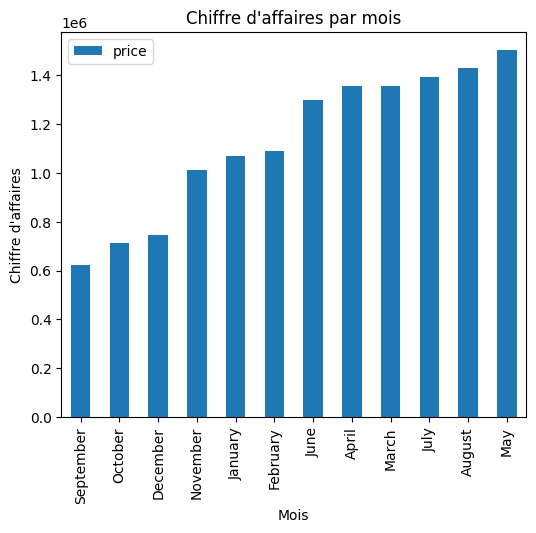

         Mois  Chiffre d'affaires
0         May          1502588.82
1      August          1428658.01
2        July          1393538.70
3       March          1357557.74
4       April          1356574.98
5        June          1298162.91
6    February          1091481.73
7     January          1070343.23
8    November          1010271.37
9    December           743925.07
10    October           713727.09
11  September           624814.05


In [17]:
o_merged.groupby('month').price.sum().sort_values().reset_index().plot(x='month', y='price', kind='bar', title='Chiffre d\'affaires par mois',figsize=(6,5))
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Mois')
plt.title('Chiffre d\'affaires par mois')
plt.show()
ca_m=o_merged.groupby('month').price.sum().sort_values(ascending=False).reset_index()
ca_m.columns=['Mois', 'Chiffre d\'affaires']
print(ca_m)


Avec Mai comme mois le plus rentable avec un chiffre d'affaires de 1502588.82 reales.

Par mois-année:

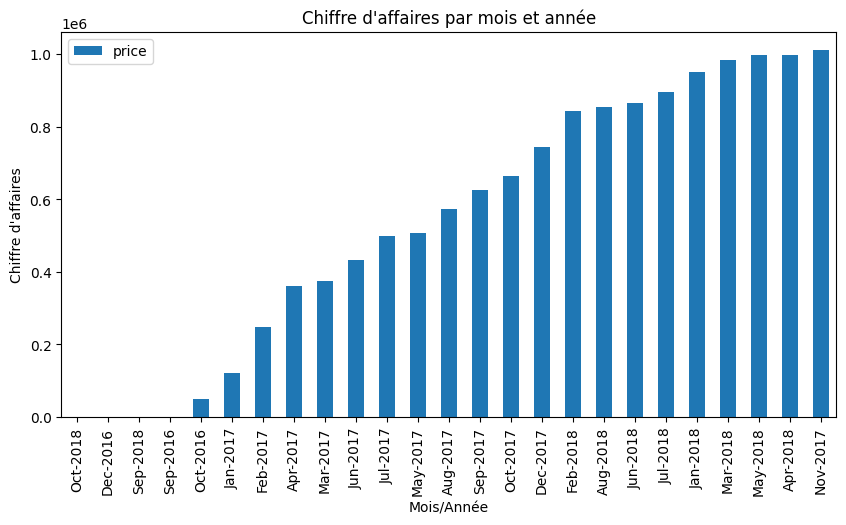

month_year
Nov-2017    1010271.37
Apr-2018     996647.75
May-2018     996517.68
Mar-2018     983213.44
Jan-2018     950030.36
Jul-2018     895507.22
Jun-2018     865124.31
Aug-2018     854686.33
Feb-2018     844178.71
Dec-2017     743914.17
Oct-2017     664219.43
Sep-2017     624401.69
Aug-2017     573971.68
May-2017     506071.14
Jul-2017     498031.48
Jun-2017     433038.60
Mar-2017     374344.30
Apr-2017     359927.23
Feb-2017     247303.02
Jan-2017     120312.87
Oct-2016      49507.66
Sep-2016        267.36
Sep-2018        145.00
Dec-2016         10.90
Oct-2018          0.00
Name: price, dtype: float64

In [18]:

o_merged.groupby('month_year').price.sum().sort_values().reset_index().plot(kind='bar', x='month_year', y='price', title='Chiffre d\'affaires par mois et année', figsize=(10,5))
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Mois/Année')
plt.title('Chiffre d\'affaires par mois et année')
plt.show()
o_merged.groupby('month_year').price.sum().sort_values(ascending=False) #chifffre d'affaires 

On remarque que le mois le plus rentable est novembre 2017 avec un chiffre d'affaires de 1010271.37 reales.

### b) La fréquence des commandes en temps $\iff$ Le nombre de commandes dans un période de temps donnée.

Pour calculer le nombre de commandes en un temps donné, on fait un group by par year, month et month_year et on compte le nombre des commandes avec un order_id unique danq ce période de temps.

Par année:

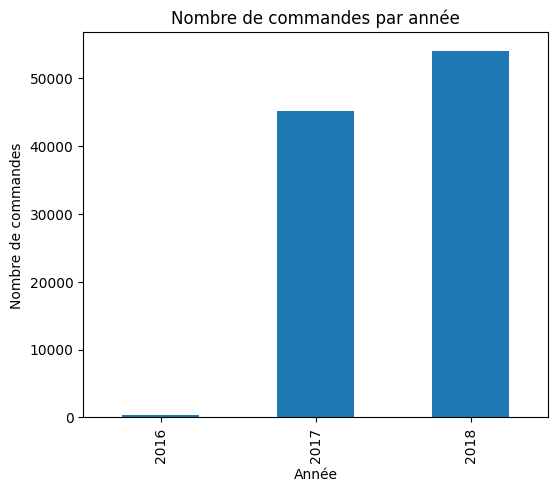

   Anee  Frequence de commandes
0  2018                   54011
1  2017                   45101
2  2016                     329
Somme de toutes les commandes par année:  99441


In [19]:
#nombre de commandes avec une id unique par année 
o_merged.groupby('year')['order_id'].nunique().plot(kind='bar', title='Nombre de commandes par année', figsize=(6,5)) 

plt.ylabel('Nombre de commandes')
plt.xlabel('Année')
plt.title('Nombre de commandes par année')
plt.show()

nb_c_a=o_merged.groupby('year')['order_id'].nunique().sort_values(ascending=False).reset_index()
nb_c_a.columns=['Anee','Frequence de commandes']
print(nb_c_a)
#somme de tous les commandes par année
print('Somme de toutes les commandes par année: ', nb_c_a.loc[:,'Frequence de commandes'].sum())


In [20]:
#Cela coincide bien avec le nb de commandes unique
uniques = o_merged['order_id'].unique()
len(uniques)

99441

On remarque que la frequence des commandes est la plus élevée en 2018 avec 54011 commandes, ensuite, on remarque que la frequence des commandes est la plus faible en 2016 avec juste 329 commandes.

Par mois-année:

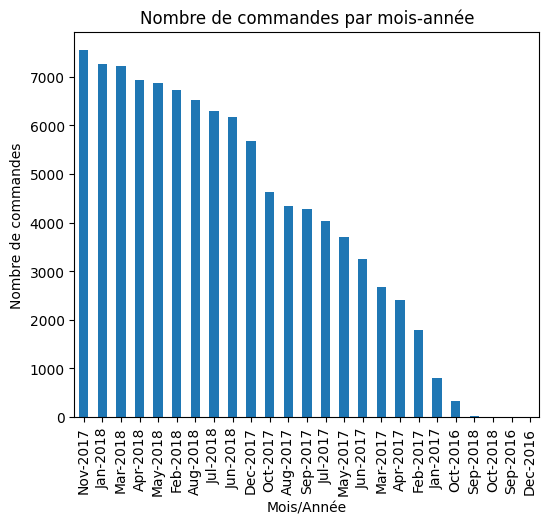

   Mois/Annee  Frequence de commandes
0    Nov-2017                    7544
1    Jan-2018                    7269
2    Mar-2018                    7211
3    Apr-2018                    6939
4    May-2018                    6873
5    Feb-2018                    6728
6    Aug-2018                    6512
7    Jul-2018                    6292
8    Jun-2018                    6167
9    Dec-2017                    5673
10   Oct-2017                    4631
11   Aug-2017                    4331
12   Sep-2017                    4285
13   Jul-2017                    4026
14   May-2017                    3700
15   Jun-2017                    3245
16   Mar-2017                    2682
17   Apr-2017                    2404
18   Feb-2017                    1780
19   Jan-2017                     800
20   Oct-2016                     324
21   Sep-2018                      16
22   Oct-2018                       4
23   Sep-2016                       4
24   Dec-2016                       1
Somme de tou

In [21]:
#nombre de commandes avec une id unique par mois-année
o_merged.groupby('month_year')['order_id'].nunique().sort_values(ascending=False).plot(kind='bar', title='Nombre de commandes par mois-année', figsize=(6,5)) 

plt.ylabel('Nombre de commandes')
plt.xlabel('Mois/Année')
plt.title('Nombre de commandes par mois-année')
plt.show()

nb_c_ma=o_merged.groupby('month_year')['order_id'].nunique().sort_values(ascending=False).reset_index()
nb_c_ma.columns=['Mois/Annee','Frequence de commandes']
print(nb_c_ma)
#somme de tous les commandes par année
print('Somme de toutes les commandes par mois-année: ', nb_c_ma.loc[:,'Frequence de commandes'].sum())


On remarque que la frequence des commandes est la plus élevée en novembre 2017 avec 7544 commandes, de plus, on remarque que la frequence des commandes est la plus faible en septembre 2018 et decembre 2016 avec 1 seule commande.

### c) Les jours de la semaine ou les ventes sont les plus rentables.

On cherche les jours de la semaine avec le chiffre d'affaires le plus élevé. On commence par créer une colonne day à partir de la colonne order_purchase_timestamp de la table o_merged, on fait un group by par day et la somme des prix de chaque commandes selon le jour.

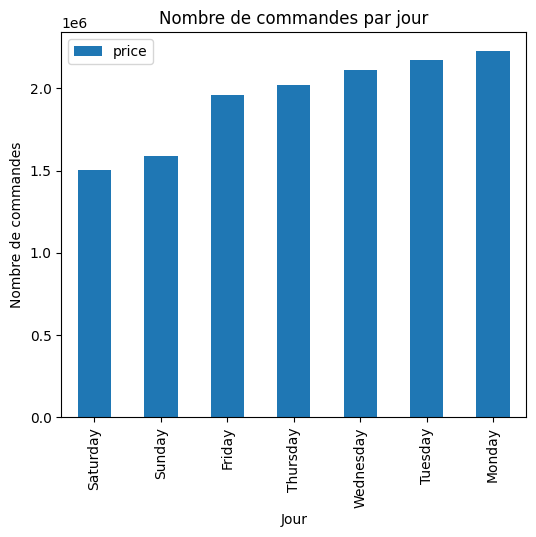

        Jour  Chiffre d'affaires
0     Monday          2230812.51
1    Tuesday          2172647.82
2  Wednesday          2113843.59
3   Thursday          2018615.78
4     Friday          1962426.75
5     Sunday          1589278.89
6   Saturday          1504018.36


In [22]:
o_merged['day']= pd.Series(pd.Categorical(o_merged['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))

o_merged.groupby('day').price.sum().sort_values().reset_index().plot(x='day', y='price', kind='bar', title='Chiffre d\'affaires par jour',figsize=(6,5))
plt.ylabel('Nombre de commandes')
plt.xlabel('Jour')
plt.title('Nombre de commandes par jour')
plt.show()
ca_j=o_merged.groupby('day').price.sum().sort_values(ascending=False).reset_index()#pour avoir le chiffre d'affaires par jour
ca_j.columns=['Jour', 'Chiffre d\'affaires']
print(ca_j)

On peut remarquer que le jour de la semaine avec le chiffre d'affaires le plus élevé est le lundi, de plus,le jour de la semaine avec le chiffre d'affaires le plus faible est le samedi.

## La variation en temps des évaluations du CAB par client


### a) Les clients les plus rentables dans le temps $\iff$ Les clients qui ont depensé le plus d'argent dans le temps. 

On va chercher les clients qui ont dépensé le plus d'argent dans le temps. On commence par faire une jointure des tables o_merged et customer par la clé customer_id (1 order a un seul customer_id) dans la table customers_order, de cette maniere on obtient une table le  customer_unique_id qui va nous permettre d'avoir tous les commandes passés par 1 seul client. Ensuite, on fait un group by par customer_unique_id car un seul client peut avoir plusieurs commandes, mais il y a un seul customer_unique_id par client, ensuite on fait la somme des prix de chaque commandes selon le client et la période de temps.

Par année:

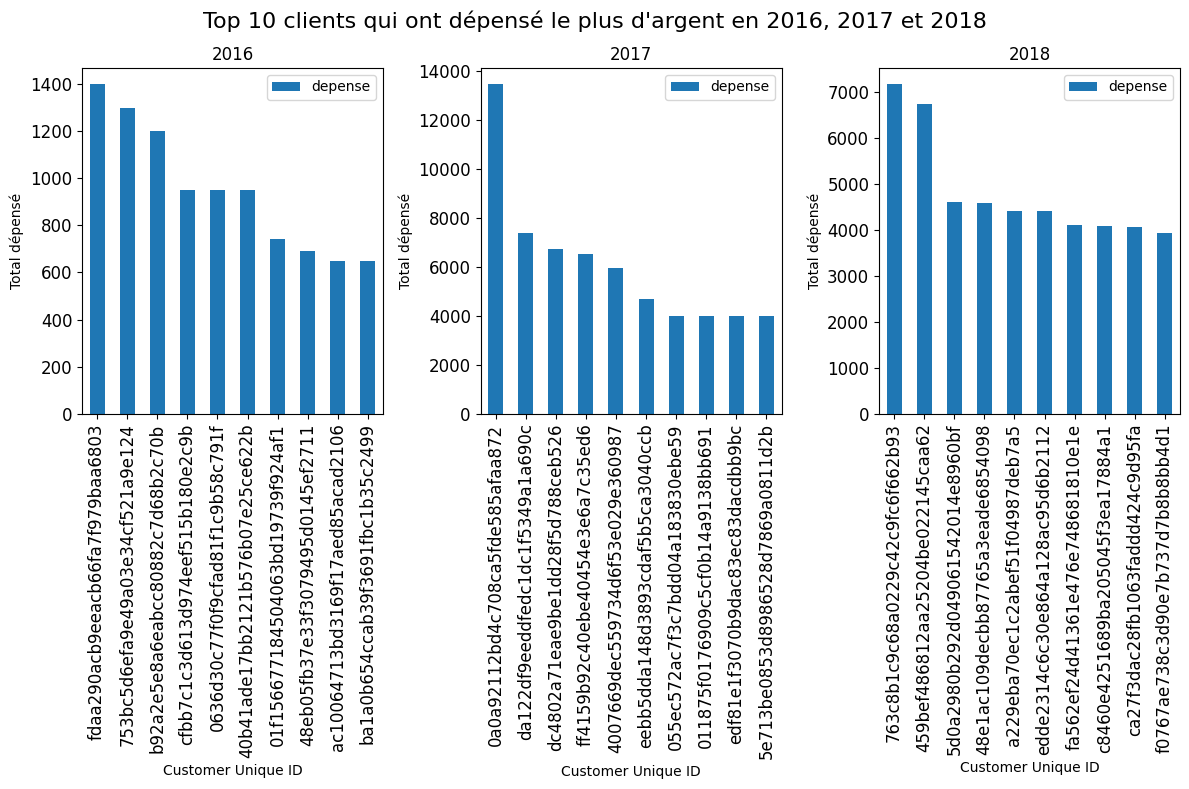

Les clients qui a plus depense dans chaque année:
                   customer_unique_id  year  depense
473  fdaa290acb9eeacb66fa7f979baa6803  2016   1399.0
                 customer_unique_id  year  depense
0  0a0a92112bd4c708ca5fde585afaa872  2017  13440.0
                 customer_unique_id  year  depense
2  763c8b1c9c68a0229c42c9fc6f662b93  2018   7160.0


In [23]:
customers_orders = pd.merge(o_merged, customers, on='customer_id', how='inner') #merge order_items et customers

#On va utiliser apply pour avoir le chiffre d'affaires par client et par année
co=customers_orders.groupby(['customer_unique_id','year']).apply(lambda x: x.price.sum()).sort_values(ascending=False).reset_index() #pour avoir le chiffre d'affaires par client et par année
co.columns = ['customer_unique_id','year','depense']

#Afficher le 10 clients qui ont dépensé le plus d'argent en 2016, 2017 et 2018.

fig, axs = plt.subplots(ncols=3)
years = [2016, 2017, 2018]
#using axs 
for i, year in enumerate(years):
    co.loc[co['year'] == year].head(10).plot(x='customer_unique_id', y='depense', kind='bar', figsize=(12, 8), legend=True, fontsize=12, ax=axs[i])
    axs[i].set_ylabel('Total dépensé')
    axs[i].set_xlabel('Customer Unique ID')
    axs[i].set_title(year)
 
fig.suptitle('Top 10 clients qui ont dépensé le plus d\'argent en 2016, 2017 et 2018', fontsize=16)
plt.tight_layout()
plt.show()
 
print('Les clients qui a plus depense dans chaque année:')
for i in years:
   print(co.loc[co['year'] == i].head(1))


On remarque que le client le plus rentable est le client 0a0a92112bd4c708ca5fde585afaa872 qui a dépensé 13440 reales.

Par mois:

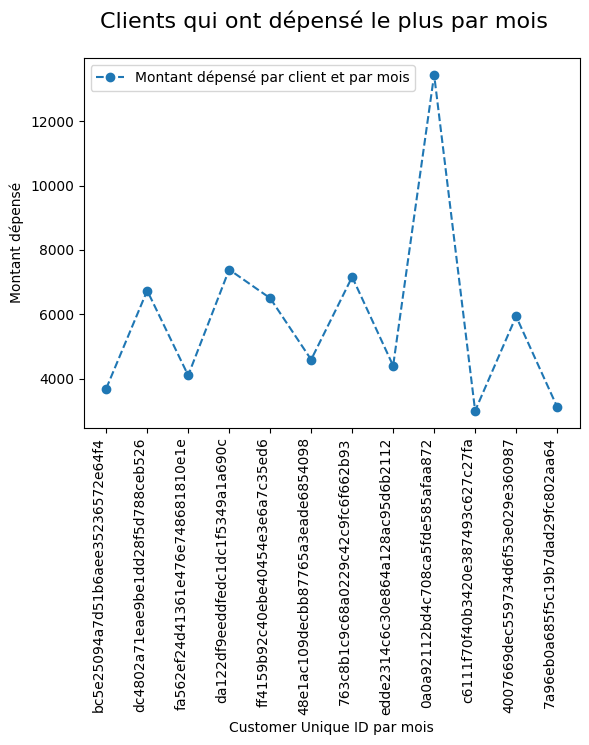

In [24]:
com=customers_orders.groupby(['customer_unique_id','month']).apply(lambda x: x.price.sum()).sort_values(ascending=False).reset_index() #montant dépensé par client et par mois
com.columns = ['customer_unique_id','month','depense']
fig, ax = plt.subplots()

clm=[]
cldm=[]
mois= ['January','February','March', 'April','May','June', 'July', 'August','September', 'October', 'November','December']

for i in mois:
    clm.append(com.loc[com['month'] == i].head(1).customer_unique_id.values[0])
    cldm.append(com.loc[com['month'] == i].head(1).depense.values[0])
    
ax.plot(clm, cldm, marker='o', linestyle='--', label='Montant dépensé par client et par mois')
ax.set_xlabel('Customer Unique ID par mois')
ax.set_ylabel('Montant dépensé')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
fig.suptitle('Clients qui ont dépensé le plus par mois', fontsize=16)
ax.legend()
plt.show()


On remarque que le client le plus rentable est le client 0a0a92112bd4c708ca5fde585afaa872 qui a dépensé 13440 reales le mois de septembre de 2017, c'est aussi le client le plus rentable par année.

Par jour:

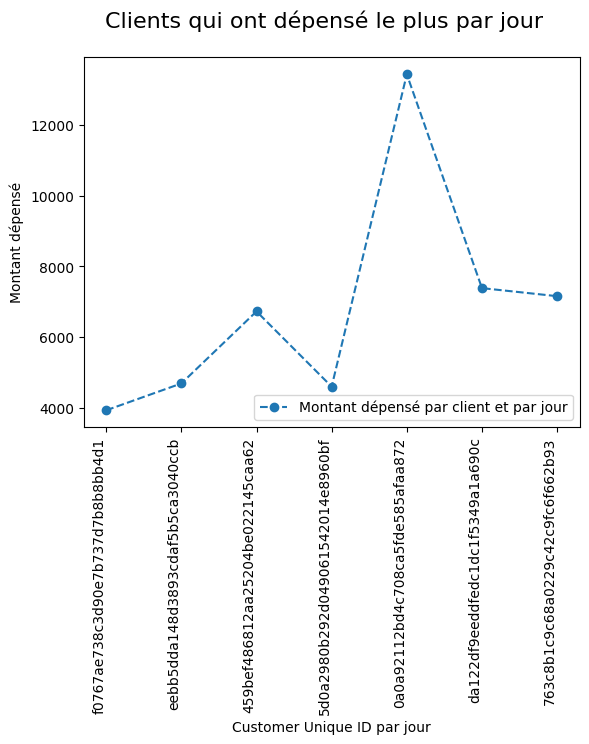

In [25]:
coj=customers_orders.groupby(['customer_unique_id','day']).apply(lambda x: x.price.sum()).sort_values(ascending=False).reset_index() #montant dépensé par client et par mois
coj.columns = ['customer_unique_id','day','depense']
fig, ax = plt.subplots()

clj=[]
cldj=[]
days= ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']

for i in days:
    clj.append(coj.loc[coj['day'] == i].head(1).customer_unique_id.values[0])
    cldj.append(coj.loc[coj['day'] == i].head(1).depense.values[0])
    
ax.plot(clj, cldj, marker='o', linestyle='--', label='Montant dépensé par client et par jour')
ax.set_xlabel('Customer Unique ID par jour')
ax.set_ylabel('Montant dépensé')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
fig.suptitle('Clients qui ont dépensé le plus par jour', fontsize=16)
ax.legend()
plt.show()


Finalement, on peut conclure que le client le plus rentable est le client 0a0a92112bd4c708ca5fde585afaa872 qui a dépensé 13440 reales le vendredi 15 septembre 2017.


### b) Les clients les plus contents dans le temps. $\iff$ Les clients qui ont la note la plus haute dans le temps.

In [26]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Ce sont les clients que selon le nombre de commandes dans tous leurs historiques la moyenne des review score est plus haute pour les commandes passées dans une période de temps donnée. On commence par faire une jointure des tables customer_orders et order_reviews par la clé order_id  en customers_o, pour avoir accès aux review_score de chaque commande, ensuite on fait un group by par customer_unique_id et par mois-aneée, ensuite on fait la moyenne des notes de chaque client pour tous ses commandes passées.

In [27]:
customers_o = pd.merge(customers_orders, order_reviews, on='order_id')
customers_o.groupby(['customer_unique_id','month_year']).review_score.mean().sort_values(ascending=False).reset_index()

,customer_unique_id,month_year,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,May-2018,5.0
1,933e593e4b63129468972275cd29656e,Dec-2017,5.0
2,934413f76823331fd8c6d6d9958f0631,Jun-2017,5.0
3,9343b1983b98b641123d716978deb844,Nov-2017,5.0
4,9342b18c97a2bbf3fa9d97aceb0b6dd4,Oct-2016,5.0
...,...,...,...
98041,3912b4eea85ce6a8745ff02382a92730,Nov-2017,1.0
98042,9b6f9ad3c080ba8a1b78434783b92ea3,Mar-2017,1.0
98043,9b6b1f44361fd76013df4c796c4333ae,Jan-2018,1.0
98044,9b685597cfc19fbeec3947b9578a5819,Dec-2017,1.0


On peut remarquer selon la liste rangée ci-dessous qu'il y a plusiers clients qui ont une note de 5.0 c'est à dire que ces clients sont les plus contents dans le temps.

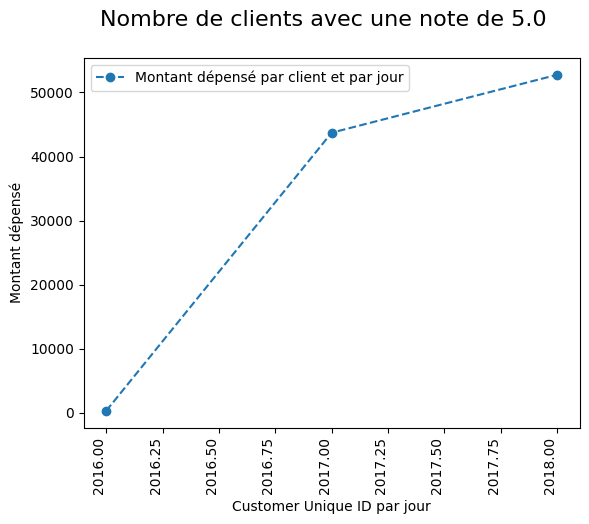

In [28]:
customers_o = pd.merge(customers_orders, order_reviews, on='order_id')
c_contents= customers_o.groupby(['customer_unique_id','year']).review_score.mean().sort_values(ascending=False).reset_index()
c_contents.columns = ['customer_unique_id','year','review_score']

fig, ax = plt.subplots()

nb_max=[]
for i in years:
   nb_max.append(c_contents.loc[c_contents['year'] == i].customer_unique_id.count())

ax.plot(years, nb_max, marker='o', linestyle='--', label='Montant dépensé par client et par jour')
ax.set_xlabel('Customer Unique ID par jour')
ax.set_ylabel('Montant dépensé')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
fig.suptitle('Nombre de clients avec une note de 5.0', fontsize=16)
ax.legend()
plt.show()


### c) Les meilleures notes et les pires dans le temps

On cherche les meilleures notes et les pires notes dans le temps, on fait un group by par review_id et par month_year et on calcule la moyenne des notes de chaque commande.

In [29]:
review_max_min= customers_o.groupby(['review_id', 'month_year']).review_score.mean().sort_values(ascending=False)
review_max_min.head(10)

review_id                         month_year
0001239bc1de2e33cb583967c2ca4c67  Feb-2018      5.0
933ae6e9a3b9d53a3beeddcc67230d4e  Feb-2018      5.0
9342182e68c2d3d3a0ecb205d1b24ada  Mar-2018      5.0
93417413fa1d43e8b9b6d3b826e15b43  Jan-2018      5.0
933f98b3352ac770f41fb47d7347e55c  Feb-2018      5.0
933f96280cfc0b82a6d89a5d02def582  May-2017      5.0
933ee6204e6fa2759e4bdbb41e11aa26  May-2018      5.0
933cf9084c10347d9e014edb68d03e30  May-2018      5.0
933ac160b48864d594dc02a167db7684  Jun-2018      5.0
9345147cd6f14292d2db41d541b95aed  Oct-2017      5.0
Name: review_score, dtype: float64

In [30]:
review_max_min.tail(10)

review_id                         month_year
9cc8dffd4c679652b7e4e20fc50ad09b  Mar-2018      1.0
3918306fc04f31c393a12070f6e66966  Oct-2016      1.0
39185e75f0bac40ce74c119ab5c93434  Feb-2017      1.0
d751bab5e874f66a91b0d3e8bd9b6af0  Mar-2018      1.0
1704f3758b8a047ae78301bb9a07b56c  Feb-2018      1.0
9cc6f404800104780fd645c3670750e2  Jun-2017      1.0
d7542f52395d4a2e58e931fe8eff53c8  Mar-2018      1.0
d7548b7360dcd74bda508b667e7f1dbe  Jul-2018      1.0
16ff561a4a5f3bb1ee46a1c5f6b3be51  Oct-2017      1.0
51af4f02d54978eb5d2b3ea30721d7be  Feb-2018      1.0
Name: review_score, dtype: float64

On peut remarquer que la note la plus haute est 5.0 et la note la plus basse est 1.0.

### d) Les villes et les régions les plus rentables dans le temps.

On cherche les villes et les régions les plus rentables dans le temps, c'est à dire les villes et les régions qui ont le chiffre d'affaires le plus élevé dans le temps.
On commence par faire une jointure des tables customers_order et geolocalisation par la clé customer_zip_code_prefix de la table customers_order et la clé geolocation_zip_code_prefix de la table geolocalisation qui representent le même prefixe des codes postaux dans chacune des tables, on fait cela pour avoir accès aux villes et aux régions de chaque client.

On enleve les "doublons" des prefixes car on s'interese pas à geolocation_lng et geolocation_lng mais à la ville qui correpond au geolocation_zip_code_prefix.

In [44]:
geolocation2= geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')

In [68]:
customers_orders_geo= pd.merge(customers_orders, geolocation2, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
#On supprime la colonne customer_zip_code_prefix car c'est la même que geolocation_zip_code_prefix
customers_orders_geo.drop('customer_zip_code_prefix', axis=1, inplace=True)
customers_orders_geo.rename(columns={'price':'revenue'}, inplace=True)

In [46]:
# customers_orders_geo.loc[customers_orders_geo.customer_id== '270c23a11d024a44c896d1894b261a83']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,month_year,day,customer_unique_id,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
81525,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,1.0,ebf9bc6cd600eadd681384e3116fda85,...,Aug-2017,Tuesday,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,3227.0,-23.583687,-46.569762,sao paulo,SP
81526,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,2.0,ebf9bc6cd600eadd681384e3116fda85,...,Aug-2017,Tuesday,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,3227.0,-23.583687,-46.569762,sao paulo,SP
81527,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,3.0,5ddab10d5e0a23acb99acf56b62b3276,...,Aug-2017,Tuesday,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,3227.0,-23.583687,-46.569762,sao paulo,SP


Ensuite, on fait un group by par ville ou region, et par année, et on calcule la somme des prix des commandes selon la ville et ou la région.

Par ville et par année:

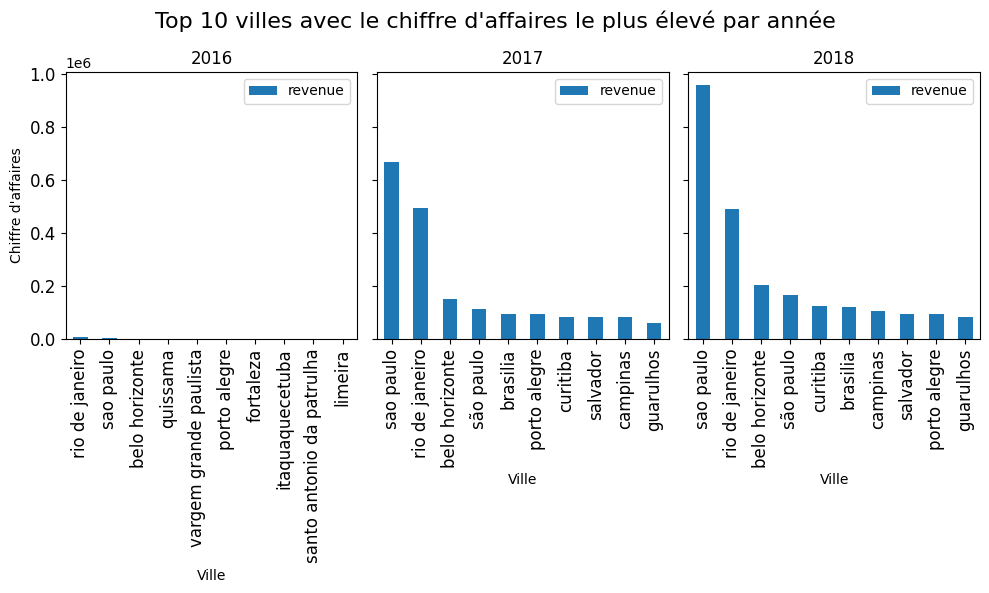

In [110]:

cogy=customers_orders_geo.groupby(['geolocation_city','year']).revenue.sum().sort_values(ascending=False).reset_index() #'geolocation_city','year','

#Graphique des 10 villes qui ont généré le plus de chiffre d'affaires par année.
fig, axs = plt.subplots(ncols=3, sharey=True)

years = [2016, 2017, 2018]
for i, year in enumerate(years):
    cogy.loc[cogy['year'] == year].head(10).plot(x='geolocation_city', y='revenue', kind='bar', figsize=(10, 6), legend=True, fontsize=12, ax=axs[i])
    axs[i].set_xlabel('Ville')
    axs[i].set_ylabel('Chiffre d\'affaires')
    axs[i].set_title(year)
    #common y axis values
    # axs[i].set_ylim(0, 1000000)
 
fig.suptitle('Top 10 villes avec le chiffre d\'affaires le plus élevé par année', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()
    


In [50]:
cogy.head(10)

,geolocation_city,year,revenue
0,sao paulo,2018,960496.09
1,sao paulo,2017,668073.25
2,rio de janeiro,2017,493830.58
3,rio de janeiro,2018,490646.83
4,belo horizonte,2018,204038.63
5,são paulo,2018,167826.00
6,belo horizonte,2017,150067.26
7,curitiba,2018,126216.62
8,brasilia,2018,119967.24
9,são paulo,2017,114206.09


On remarque que la ville la plus rentable dans les trois années est la ville de Rio de Janeiro, ce qui est un peu surprenant car São Paulo est la ville la plus peuplée du Brésil.

Par région et par année:

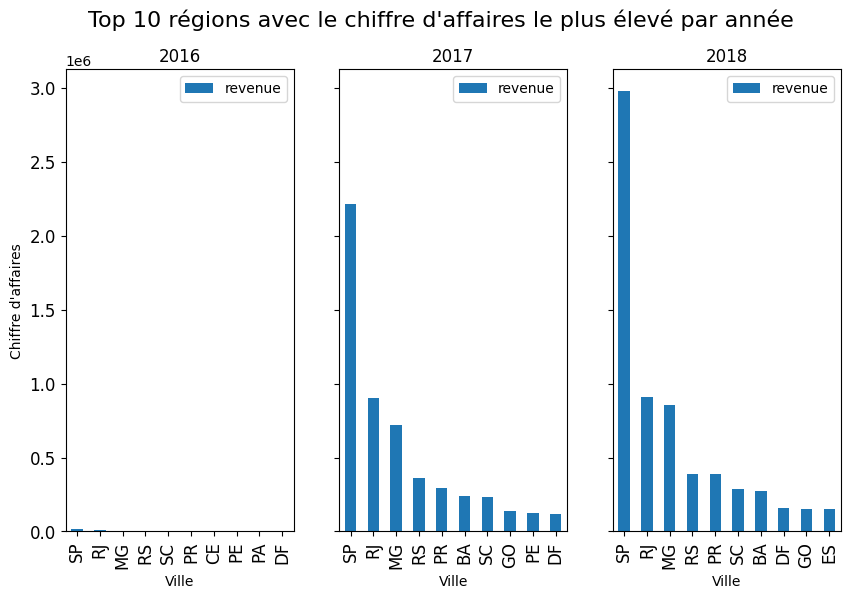

In [111]:
#Cette fois-ci on regarde les regions qui ont généré le plus de chiffre d'affaires par année.

cogry=customers_orders_geo.groupby(['geolocation_state','year']).revenue.sum().sort_values(ascending=False).reset_index()
#on change le nom de la colonne price en revenue

#Graphique des 10 regions qui ont généré le plus de chiffre d'affaires par année.
fig, axs = plt.subplots(ncols=3, sharey=True)

years = [2016, 2017, 2018]
for i, year in enumerate(years):
    cogry.loc[cogry['year'] == year].head(10).plot(x='geolocation_state', y='revenue', kind='bar', figsize=(10, 6), legend=True, fontsize=12, ax=axs[i])
    axs[i].set_xlabel('Ville')
    axs[i].set_ylabel('Chiffre d\'affaires')
    axs[i].set_title(year)
    
fig.suptitle('Top 10 régions avec le chiffre d\'affaires le plus élevé par année', fontsize=16)
ax.legend()
plt.show()
    

In [57]:
cogry.head(10)

,geolocation_state,year,revenue
0,SP,2018,2974211.67
1,SP,2017,2212070.42
2,RJ,2018,906074.43
3,RJ,2017,905125.67
4,MG,2018,856768.80
5,MG,2017,722793.45
6,RS,2018,386882.21
7,PR,2018,385373.55
8,RS,2017,359031.65
9,PR,2017,295009.77


On peut remarquer que la région la plus rentable dans les trois années est la région de São Paulo, ce qui est logique car São Paulo est la region la plus peuplée du Brésil.

## La variation en temps des Frais, du CAN, par client et par catégorie produit

 ### a)  La variation des frais dans le temps (année, mois, jours de la semaine)

On cherche la variation des frais dans le temps par client et par catégorie produit, pour voir si les frais changent selon la période de temps et la catégorie du produit. 

On commence par faire une jointure des tables customers_order et products par la clé product_id en customers_orders_products, on fait cela pour avoir accès aux catégories de chaque produit, ensuite on fait un group by par product_category_name et par année, ensuite on calcule la moyennes des frais des commandes qui est faite selon la catégorie du produit et selon la période de temps.


In [62]:
customers_orders_products= pd.merge(customers_orders, products, on='product_id')
# cop_cp= customers_orders_products.groupby(['product_category_name','year']).freight_value.mean()
cop_cp= customers_orders_products.groupby(['product_category_name','year']).apply(lambda x: x['freight_value'].mean()).reset_index()
cop_cp.columns=['product_category_name','year','freight_value']

# Il y 74 categrioies de produits donc on a 74 graphiques. 

# #graphique qui montre la variation des frais de livraison en fonction de la catégorie de produit et par annee
# cat = customers_orders_products.product_category_name.unique()
# categories= list(cat)
# categories.remove(np.nan)

# for category in categories:
#     cop_cp.loc[cop_cp['product_category_name'] == category].plot(x='year', y='freight_value', kind='bar', figsize=(5, 5), legend=True, fontsize=12)
#     plt.xlabel('Year')
#     plt.ylabel('Freight Value')
#     plt.title(category)
# # c'est bon??
# # hacer lo mismo para el mes y los dias


In [66]:
categories= customers_orders_products['product_category_name'].unique()
print(categories)


['utilidades_domesticas' 'perfumaria' 'automotivo' 'pet_shop' 'papelaria'
 nan 'moveis_decoracao' 'moveis_escritorio' 'ferramentas_jardim'
 'informatica_acessorios' 'cama_mesa_banho' 'brinquedos'
 'construcao_ferramentas_construcao' 'telefonia' 'beleza_saude'
 'eletronicos' 'bebes' 'cool_stuff' 'relogios_presentes' 'climatizacao'
 'esporte_lazer' 'livros_interesse_geral' 'eletroportateis' 'alimentos'
 'malas_acessorios' 'fashion_underwear_e_moda_praia' 'artigos_de_natal'
 'fashion_bolsas_e_acessorios' 'instrumentos_musicais'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'construcao_ferramentas_jardim' 'eletrodomesticos' 'market_place'
 'agro_industria_e_comercio' 'artigos_de_festas' 'casa_conforto'
 'cds_dvds_musicais' 'industria_comercio_e_negocios' 'consoles_games'
 'moveis_quarto' 'construcao_ferramentas_seguranca' 'telefonia_fixa'
 'bebidas' 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'fashion_calcados' 'casa_construcao' 'audio' 'eletrodomesticos_2'
 'fashion_roupa_

### b) La variation des frais dans le temps par région géographique

On cherche la variation des frais dans le temps par rapport à la région géographique, pour voir si les frais changent selon région géographique dans le temps. On fait un group by par region et par année, et on calcule la moyennes des frais des commandes.

Par region et par année:
(Il y a 27 régions)

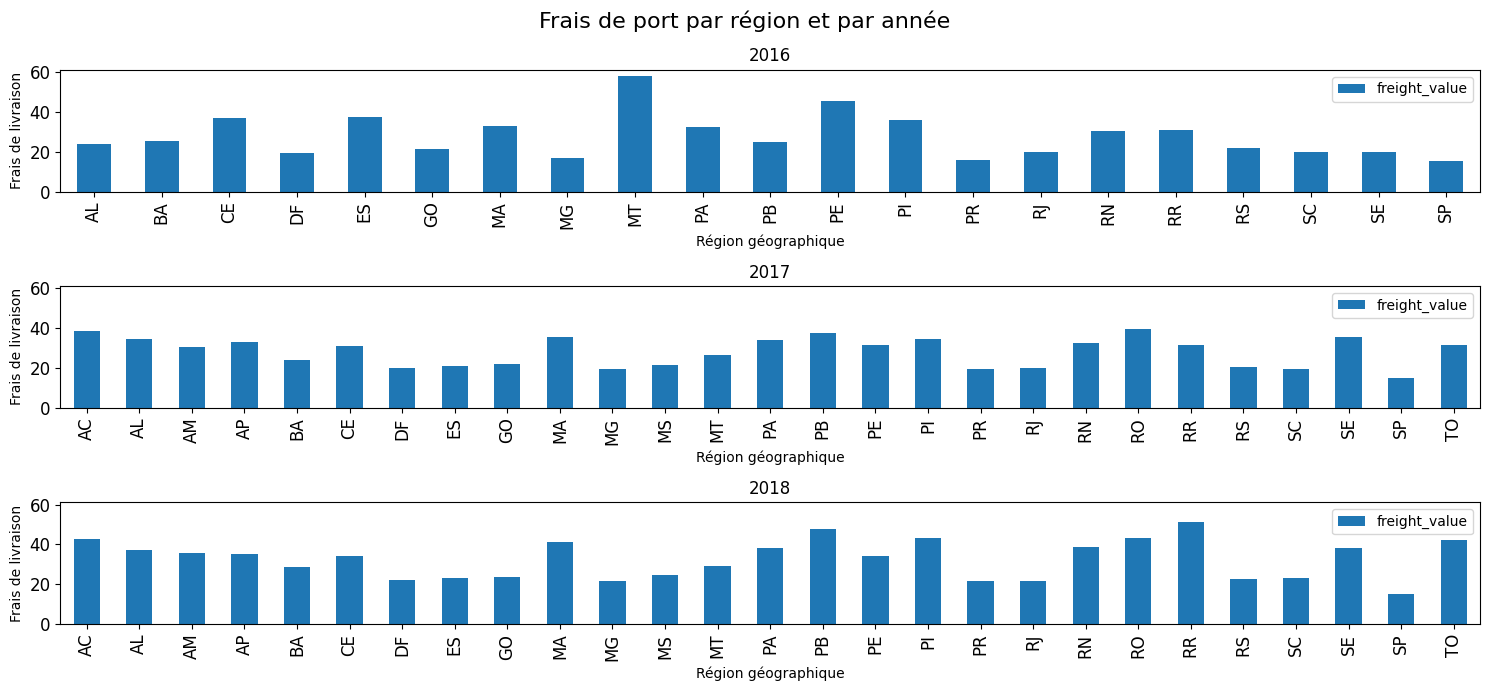

,geolocation_state,year,0
0,MT,2016,58.280000
1,RR,2018,51.357000
2,PB,2018,47.550906
3,PE,2016,45.627143
4,RO,2018,43.108632
...,...,...,...
70,MG,2016,16.861250
71,PR,2016,15.973667
72,SP,2018,15.242963
73,SP,2016,15.230000


In [169]:
#La variation des frais dans le temps par région géographique. (geolocation_state)
cog_rg= customers_orders_geo.groupby(['geolocation_state', 'year']). apply(lambda x: x['freight_value'].mean()).reset_index()
cog_rg.columns=['geolocation_state','year','freight_value']
#Graphique pour voir la variation des frais de livraison en fonction de la région géographique et par annee

fig, axs = plt.subplots(3, 1, figsize=(15, 5), sharey=True)
years = [2016, 2017, 2018]
for i, year in enumerate(years):
    cog_rg.loc[cog_rg['year'] == year].plot(x='geolocation_state', y='freight_value', kind='bar', figsize=(15, 7), legend=True, fontsize=12, ax=axs[i])
    axs[i].set_xlabel('Région géographique')
    axs[i].set_ylabel('Frais de livraison')
    axs[i].set_title(year)
    
    
fig.suptitle('Frais de port par région et par année', fontsize=16)
plt.tight_layout()
ax.legend()
plt.show()

customers_orders_geo.groupby(['geolocation_state', 'year']).apply(lambda x: x['freight_value'].mean()).sort_values(ascending=False).reset_index()

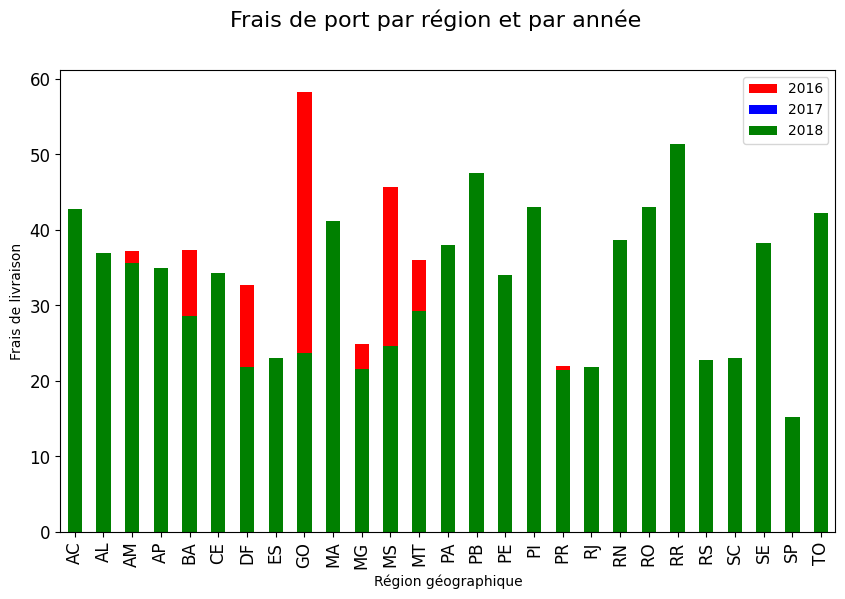

In [165]:
fig, ax = plt.subplots(figsize=(15, 5))
years = [2016, 2017, 2018]
colors = ['red', 'blue', 'green']

for i, year in enumerate(years):
    df = cog_rg.loc[cog_rg['year'] == year]
    df.plot(x='geolocation_state', y='freight_value', kind='bar', figsize=(10, 6), legend=True, fontsize=12, ax=ax, color=colors[i])

ax.set_xlabel('Région géographique')
ax.set_ylabel('Frais de livraison')

fig.suptitle('Frais de port par région et par année', fontsize=16)
ax.legend(years)
plt.show()

On remarque qu'il y a des régions dans lesquelles les frais sont plus élevés en 2018 par rapport à 2017 et vice versa, mais on remarque aussi que les frais sont moins elevés dans les grades régions comme São Paulo et Rio de Janeiro.

### c) Les meilleures notes et les pires dans le temps pour les catégories produits.

On cherche les meilleures notes et les pires notes dans le temps pour les catégories produits, on fait une jointure des tables customers_o et products par la clé product_id,  on fait cela pour avoir accès aux catégories de chaque produit et aux review_score, ensuite on fait un group by par product_category_name et par année et on calcule la moyenne des notes de chaque commande (review_score).

Produits le mieux notés
2016 ['alimentos' 'audio' 'livros_interesse_geral' 'fraldas_higiene'
 'fashion_roupa_feminina' 'fashion_calcados']
2017 ['artes_e_artesanato']
2018 ['fashion_roupa_infanto_juvenil' 'cds_dvds_musicais']
Produits le pire notés
2016 ['livros_tecnicos' 'fashion_roupa_masculina']
2017 ['fraldas_higiene']
2018 []


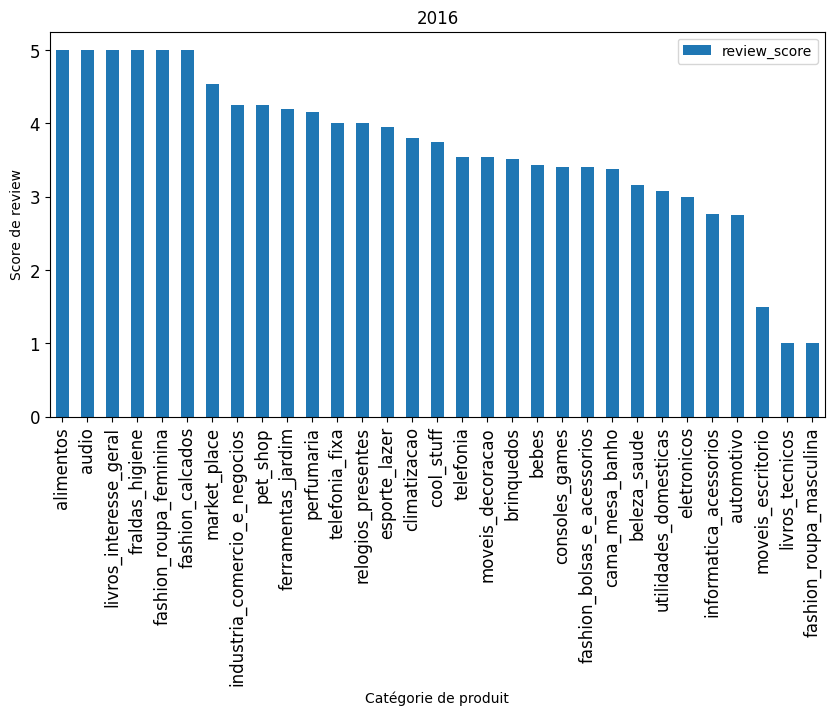

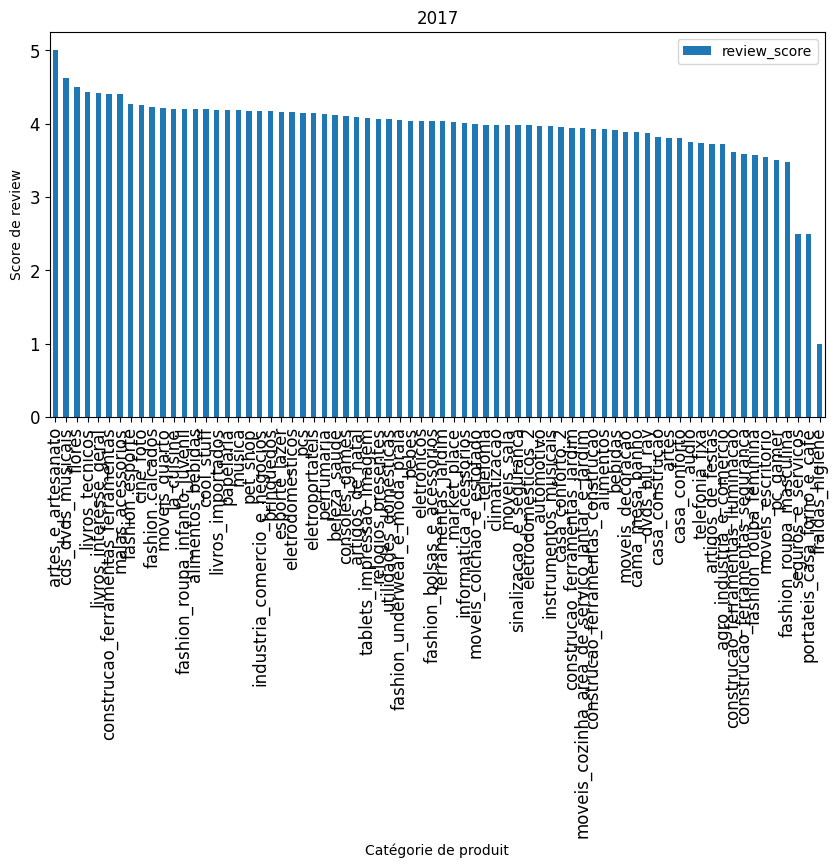

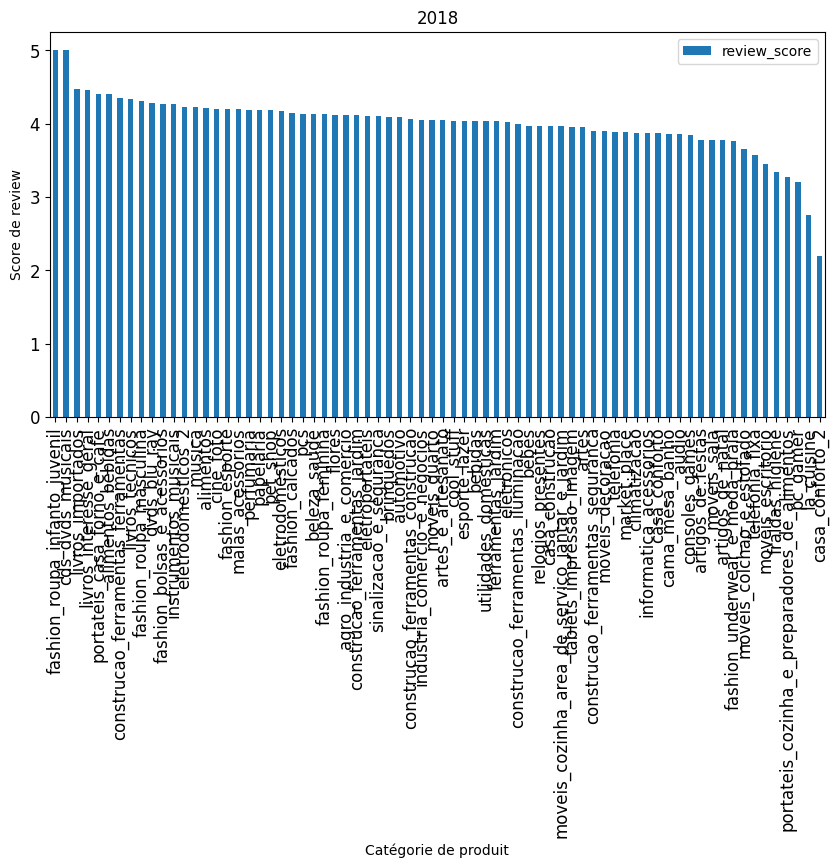

In [159]:
customers_o_reviews=customers_o.merge(products, on='product_id')

cor= customers_o_reviews.groupby(['year', 'product_category_name']).apply(lambda x: x['review_score'].mean()).sort_values(ascending=False).reset_index()
cor.columns=['year', 'product_category_name', 'review_score']

for i, year in enumerate(years):
    cor.loc[cor['year'] == year].plot(x='product_category_name', y='review_score', kind='bar', figsize=(10, 5), legend=True, fontsize=12)
    plt.xlabel('Catégorie de produit')
    plt.ylabel('Score de review')
    plt.title(year)

#Produits avec un score de review de 5.0 pour les 3 ans
print('Produits le mieux notés')
for year in enumerate(years):
    if year[1] == 2016:
        print('2016', cor.loc[(cor['year'] == year[1]) & (cor['review_score'] == 5.0)]['product_category_name'].values)
    if year[1] == 2017:
        print('2017',cor.loc[(cor['year'] == year[1]) & (cor['review_score'] == 5.0)]['product_category_name'].values)
    if year[1] == 2018:
        print('2018',cor.loc[(cor['year'] == year[1]) & (cor['review_score'] == 5.0)]['product_category_name'].values)
        
# Produits avec un score de review de 1.0 pour les 3 ans
print('Produits le pire notés')
for year in enumerate(years):
    if year[1] == 2016:
        print('2016', cor.loc[(cor['year'] == year[1]) & (cor['review_score'] == 1.0)]['product_category_name'].values)
    if year[1] == 2017:
        print('2017',cor.loc[(cor['year'] == year[1]) & (cor['review_score'] == 1.0)]['product_category_name'].values)
    if year[1] == 2018:
        print('2018',cor.loc[(cor['year'] == year[1]) & (cor['review_score'] == 1.0)]['product_category_name'].values)

On peut remarquer qu'en moyenne il n'y a pas autant des produits si mal ou si bien notés dans le temps, en tentant en compte qu'il y a 74 catégories de produits, il n'y aucun categorie de produit qui a une note de 1.0 ou 5.0 dans les trois années.

<!-- df['Day'] = pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))
df.groupby('Day').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)
day = df.groupby('Day').size().sort_values()

 fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=day.index, x=day.values)
plt.title('Days',fontsize=20)
We can see more online shopping happen on weekdays and less on weekends. -->